In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import cv2

(750, 750, 3)


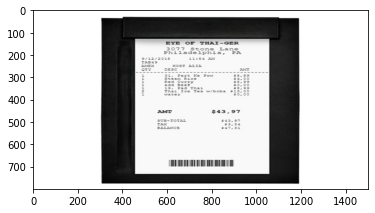

In [2]:
im_path = "/content/drive/MyDrive/Deep Learning/bill.jpg"
#read image 
img = cv2.imread(im_path)
print(img.shape)


# resize the image
img = cv2.resize(img, (1500,800))

plt.imshow(img)
#BGR format : BGR -> RGB 


Removing Noise 

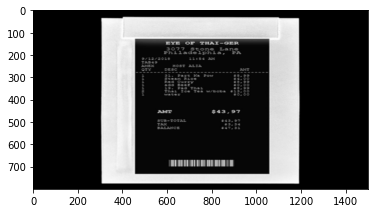

In [3]:
# Blur the image

orig = img.copy()
gray = cv2.cvtColor(orig, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray' )

blurred = cv2.GaussianBlur(gray, (5,5), 0)
plt.imshow(blurred, cmap='binary')

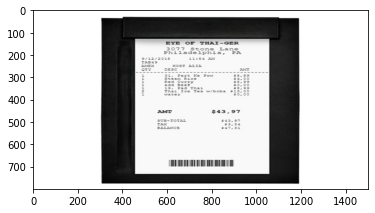

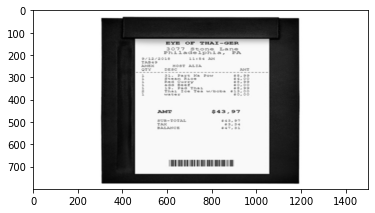

(800, 1500, 3)

In [4]:
regen = cv2.cvtColor(blurred, cv2.COLOR_GRAY2BGR)
plt.imshow(orig)
plt.show()
plt.imshow(regen)
plt.show()
regen.shape

Edge Detection


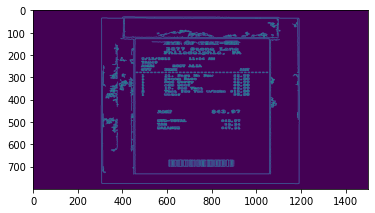

In [5]:
edge = cv2.Canny(blurred, 0,50)
orig_edge = edge.copy()

plt.imshow(orig_edge)

Counter Extraction


In [6]:
contours, _ =cv2.findContours(edge, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

print(len(contours))

contours = sorted(contours , reverse= True, key = cv2.contourArea)

980


In [7]:
#Select the best Contour region

for c in contours:

  p = cv2.arcLength(c,True)

  approx = cv2.approxPolyDP(c, 0.01 *p, True)

  if len(approx) ==4 :
    target = approx
    break

print(target.shape)


(4, 1, 2)


Reorder Contours

In [8]:
def reorder(h):
  h = h .reshape((4,2))
  print(h)

  hnew = np.zeros((4,2), dtype = np.float32)

  add = h.sum(axis =1)
  hnew[3] = h[np.argmax(add)]
  hnew [1] = h[np.argmax(add)]

  diff = np.diff(h, axis=1)
  hnew[0] = h[np.argmax(diff)]
  hnew [2] = h[np.argmax(diff )]

  return hnew


In [9]:
reorder = reorder(target)
print('**************')
print(reorder)

[[ 306   36]
 [ 308  774]
 [1191  774]
 [1189   36]]
**************
[[ 308.  774.]
 [1191.  774.]
 [ 308.  774.]
 [1191.  774.]]


Project to a Fixed Screen

In [10]:
input_representation = reorder 
output_map = np.float32([[0,0],[800,0],[800,800],[0,800]])

In [11]:
M = cv2.getPerspectiveTransform(input_representation, output_map)

ans = cv2.warpPerspective(orig, M, (800,800))

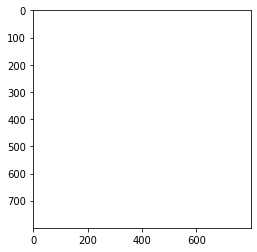

In [12]:
plt.imshow(ans)

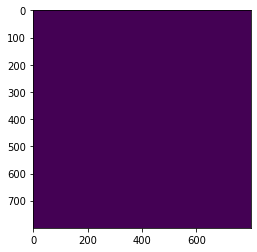

In [16]:
res= cv2.cvtColor(ans, cv2.COLOR_BGR2GRAY)
b_res = cv2.GaussianBlur(res, (3,3), 0)   #Denoise 
plt.imshow(b_res)